<a href="https://colab.research.google.com/github/indramaia/shark_attack/blob/main/Shark_attacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
# Importamos as bibliotecas a serem utilizadas para cálculos e para visualização
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

▶ Variáveis
* Localização
* fatalidade
* idade
* atividade
* gênero
* espécie do tubarão
* tipo de lesão

▶ Métricas
* Quantidade de ataques por localização
* Taxa de ataques fatais por localização
* % de ataques por gênero 
* % de ataques por atividade
* % fatalidade por espécie de tubarão

▶Extração 
* Kaggle

▶ Perguntas
* Quais métricas tem correlação com a fatalidade do ataque?
(localização, atividade, idade, sexo, espécie de tubarão)
* Qual é o ranking de fatalidade por localização?
* Quais são os tipos de lesões mais frequentes ? (classificar tipos de lesões)
* Qual a diferença entre Type e Activity?

In [49]:
# shark_attack

# Status: completado

# Objetivo: pergunta 

# Ferramentas Trabalhadas: Pandas

# Passo a passo: como consegui ou não responder a essa pergunta 

# Conclusão

In [38]:
# 1: LIMPEZA DOS DADOS (retiramos colunas, renomeamos variáveis e criamos novas colunas/variáveis)

# 1.1 Renomeamos algumas colunas
shark_df = shark_df.rename(columns = {'Fatal (Y/N)': 'Fatal'})

# 1.2 Criamos uma nova coluna com a proporção das métricas que queremos visualizar

In [39]:
shark_df = pd.read_csv('https://docs.google.com/spreadsheets/d/1_aJ-4WE0PfYe6j07XzPswPtfPfyd8i6qdCHOihfBHmU/export?format=csv', sep =',')
shark_df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-jun.-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-jun.-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-jun.-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-jun.-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-jun.-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2014.10.02.b,02-Oct-2014,2014.0,Unprovoked,USA,California,"Walls Beach, Vandenberg AFB, Santa Barbara County",Surfing,M.M.,M,28,Lacerations to knee,N,17h30,8' to 10' shark,"R. Collier, GSAF",2014.10.02.b-Vandenberg.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2014.10.02.b,2014.10.02.b,5808.0,NaN,NaN
496,2014.10.02.a,02-Oct-2014,2014.0,Unprovoked,AUSTRALIA,Western Australia,"Kelpids Beach, Wylie Bay, Esperance",Surfing,Sean Pollard,M,23,"Left arm & right hand severed, lacerations to ...",N,11h00,"2 white shark: 13' & 9""8""","9News, 2/15/2015",2014.10.02.a-Pollard.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2014.10.02.a,2014.10.02.a,5807.0,NaN,NaN
497,2014.09.21,21-Sep-2014,2014.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Jordan Lefebvre,M,NaN,Minor injury to left foot,N,11h30,NaN,"NBC2 News, 9/21/2014",2014.09.21-Lefebvre.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2014.09.21,2014.09.21,5806.0,NaN,NaN
498,2014.09.13.R,Reported 12-Sep-2014,2014.0,Unprovoked,FRENCH POLYNESIA,Moorea,Tiahura Lagoon,Feeding fish,female,F,36,Thumb & finger nipped,N,NaN,Blacktip shark,"LeDepeche, 9/12/2014",2014.09.12.R-Moorea.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2014.09.13.R,2014.09.13.R,5805.0,NaN,NaN


In [6]:
shark_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5761 non-null   object 
 7   Activity                5756 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3468 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2944 non-null   object 
 14  Species                 3458 non-null 

In [31]:
shark_df.describe()

,Year,original order
count,6300.000000,6309.000000
mean,1927.272381,3155.999683
std,281.116308,1821.396206
min,0.000000,2.000000
25%,1942.000000,1579.000000
50%,1977.000000,3156.000000
75%,2005.000000,4733.000000
max,2018.000000,6310.000000


In [5]:
missing_values = shark_df.isnull().sum()
missing_values

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19962
Activity                  19967
Name                      19631
Sex                       19986
Age                       22255
Injury                    19449
Fatal (Y/N)               19960
Time                      22779
Species                   22265
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [40]:
shark_df.drop(['Case Number', 'Case Number.1','Case Number.2','Unnamed: 22','Unnamed: 23', 'pdf', 'href formula',	'href' ], axis =1)

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order
0,25-jun.-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",6303.0
1,18-jun.-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",6302.0
2,09-jun.-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",6301.0
3,08-jun.-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",6300.0
4,04-jun.-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
shark_df['Year'] #como ver + linhas? 

0        2018.0
1        2018.0
2        2018.0
3        2018.0
4        2018.0
          ...  
25718       NaN
25719       NaN
25720       NaN
25721       NaN
25722       NaN
Name: Year, Length: 25723, dtype: float64

In [26]:
# WE GOTTA UNDERSTAND IF ORIGINAL ORDER IS LIKE THE UNIQUE KEY FOR THE ATTACK, IF SO THAT WOULD BE THE NUMBER TO CHECK FOR DUPLICATES
~shark_df.duplicated(keep=False,subset=['original order'])

0         True
1         True
2         True
3         True
4         True
         ...  
25718    False
25719    False
25720    False
25721    False
25722    False
Length: 25723, dtype: bool

(0.0, -10.15)

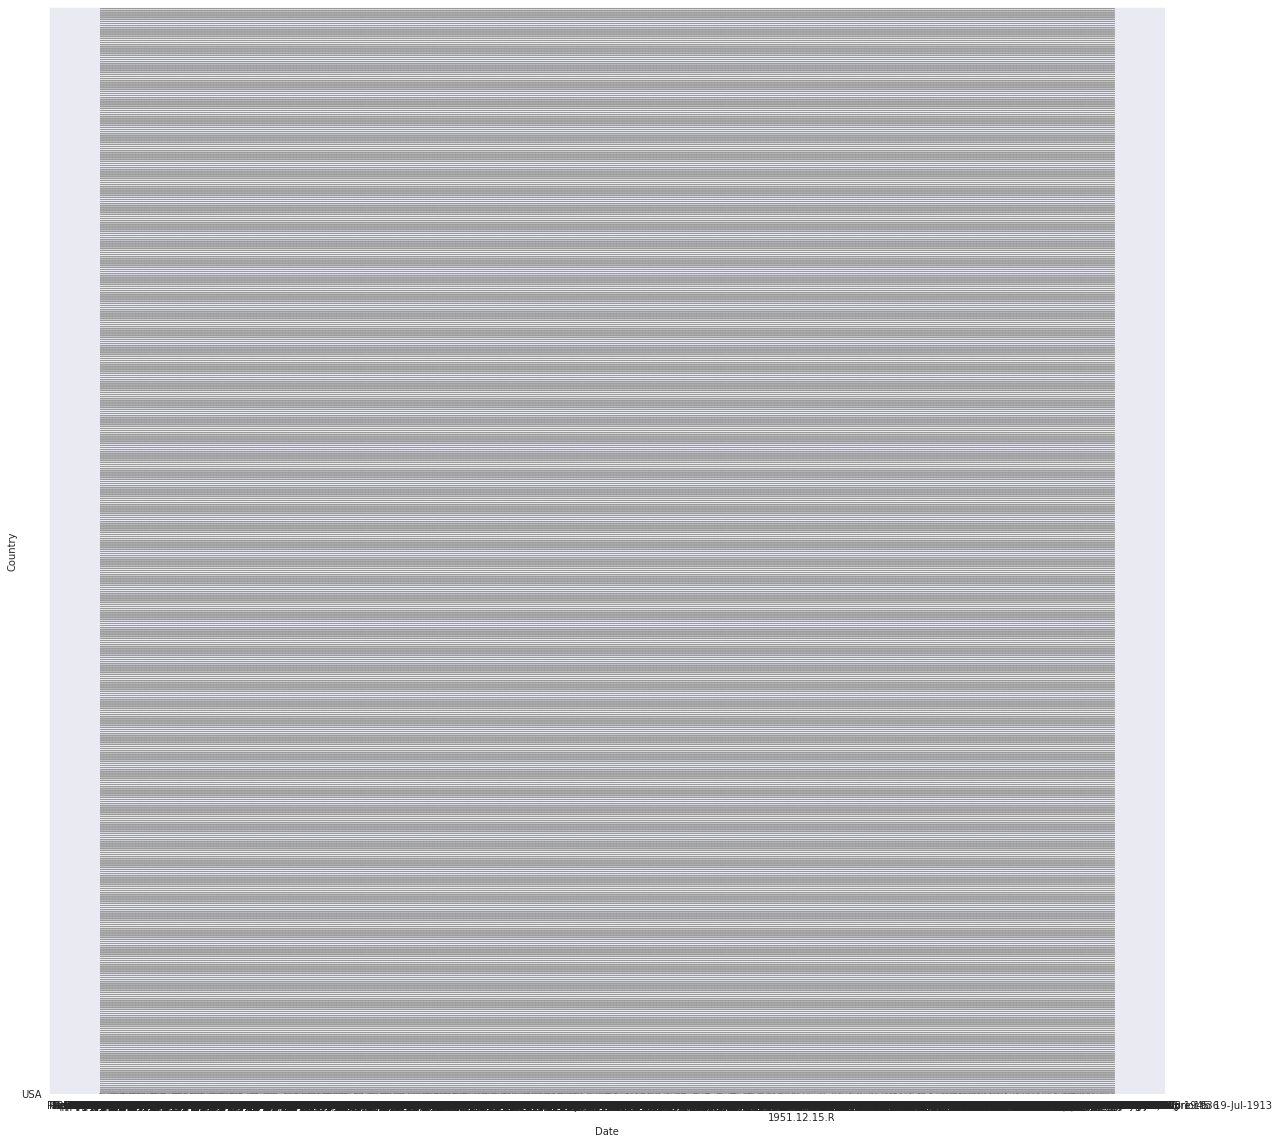

In [48]:
# Gráfico que mostra os ataques de tubarão no mundo
sb.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sb.lineplot(x= shark_df['Date'], y= shark_df['Country'])
plt.ylim(0)

fig, ax = plt.subplots()
ax.barh(group_names, group_data)

In [34]:
# plotting a bar graph for the number of yearly attacks
shark_df.plot(x="Date", y="Fatal (Y/N)", kind="bar")

TypeError: ignored